# Urban Water Quality Prediction
Importing necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Importing dataset
1. Since data is in form of csv file we have to use pandas read_csv to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation   such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done,
   a.Imputing data using Imputation method in sklearn
   b.Filling NaN values with mean, median and mode using fillna() method
4. Describe data --> which can give statistical analysis

In [67]:
data=pd.read_csv(r"C:\Users\win10\OneDrive\Desktop\Urban_water_Quality_prediction-main\Urban_water_Quality_prediction-main\data_set\water_data.csv",encoding = 'ISO-8859-1',low_memory = False)

#head() method is used to return top n (5 by default) rows of a DataFrame or series.

In [3]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
STATION CODE                        1991 non-null object
LOCATIONS                           1991 non-null object
STATE                               1991 non-null object
Temp                                1991 non-null object
D.O. (mg/l)                         1991 non-null object
PH                                  1991 non-null object
CONDUCTIVITY (µmhos/cm)             1991 non-null object
B.O.D. (mg/l)                       1991 non-null object
NITRATENAN N+ NITRITENANN (mg/l)    1991 non-null object
FECAL COLIFORM (MPN/100ml)          1991 non-null object
TOTAL COLIFORM (MPN/100ml)Mean      1991 non-null object
year                                1991 non-null int64
dtypes: int64(1), object(11)
memory usage: 186.7+ KB


In [5]:
#describe() method computes a summary of statistics like count, mean, standard deviation, min, max and quartile values.
data.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [6]:
data.shape

(1991, 12)

#### The Data Contains 12 columns and 1991 Rows and now let us check for null values in the dataset

## Exploratory Data Analysis

### Finding And Replacing Missing Values

In [7]:
data.isnull().any() #No Missing Values

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

In [8]:
#count of null values in each column
data.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [9]:
#check the datatype of the column
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

#### The datatype of numeric columns is also object .so,let us convert into float datatype

In [10]:
#Let us convert object datatype to float for calculation of water quality index
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [11]:
data.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)            0
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

### Now we can see that there are null values in dataset.let us handle this null data by replacing it with mean or mode

In [12]:
data['Temp'].fillna(data['Temp'].mean(),inplace=True)
data['D.O. (mg/l)'].fillna(data['D.O. (mg/l)'].mean(),inplace=True)
data['PH'].fillna(data['PH'].mean(),inplace=True)
data['CONDUCTIVITY (µmhos/cm)'].fillna(data['CONDUCTIVITY (µmhos/cm)'].mean(),inplace=True)
data['B.O.D. (mg/l)'].fillna(data['B.O.D. (mg/l)'].mean(),inplace=True)
data['NITRATENAN N+ NITRITENANN (mg/l)'].fillna(data['NITRATENAN N+ NITRITENANN (mg/l)'].mean(),inplace=True)
data['TOTAL COLIFORM (MPN/100ml)Mean'].fillna(data['TOTAL COLIFORM (MPN/100ml)Mean'].mean(),inplace=True)

In [13]:
data.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [14]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,11,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,4953,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,3243,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,5382,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,3428,5500.0,2014


In [15]:
#let us drop FECAL COLIFORM (MPN/100ml) as we already have
data.drop(["FECAL COLIFORM (MPN/100ml)"],axis=1,inplace=True)

In [16]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,2014


In [17]:
#Let us rename the columns for simplification
data=data.rename(columns = {'D.O. (mg/l)':'do'})
data=data.rename(columns = {'CONDUCTIVITY (µmhos/cm)':'co'})
data=data.rename(columns = {'B.O.D. (mg/l)':'bod'})
data=data.rename(columns = {'NITRATENAN N+ NITRITENANN (mg/l)':'na'})
data=data.rename(columns =  {'TOTAL COLIFORM (MPN/100ml)Mean':'tc'})
data=data.rename(columns =  {'STATION CODE':'station'})
data=data.rename(columns =  {'LOCATIONS':'location'})
data=data.rename(columns =  {'STATE':'state'})
data=data.rename(columns =  {'PH':'ph'})

In [18]:
data.head()

,station,location,state,Temp,do,ph,co,bod,na,tc,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,2014


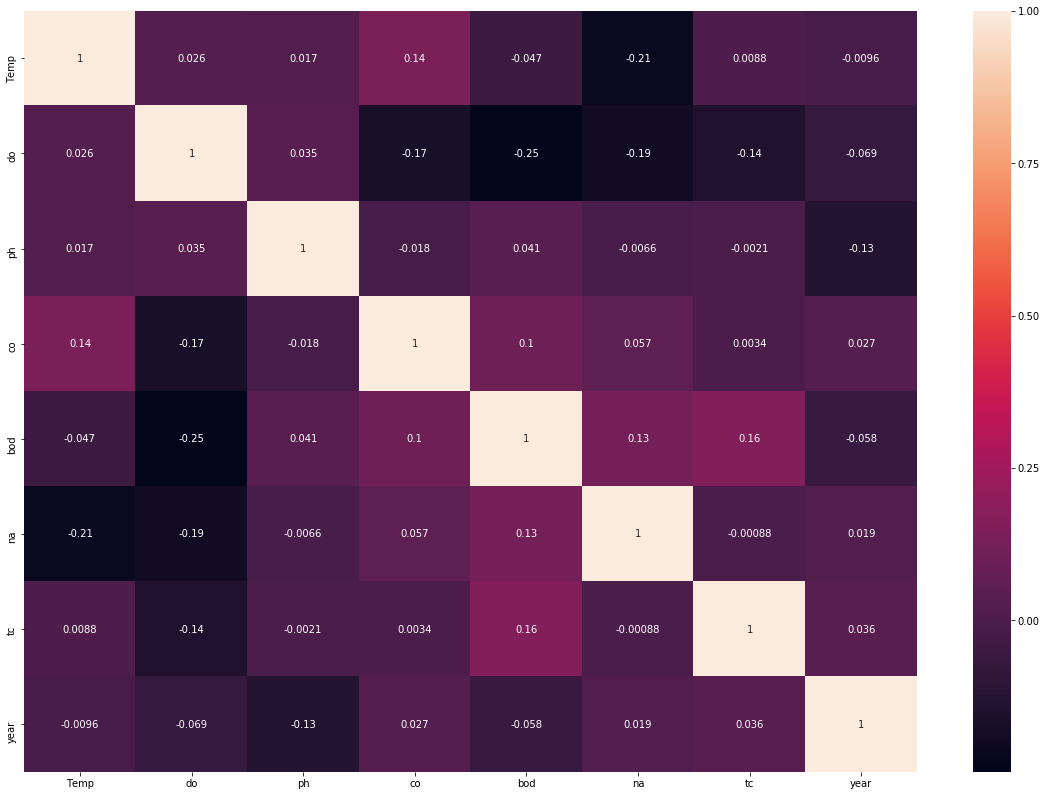

In [19]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(data.corr(),annot = True)
plt.show()

In [20]:
#calulation of Ph
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

In [21]:
#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [22]:
#calculation of total coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [23]:
#calc of B.D.O
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [24]:
#calculation of electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)
                                else(80 if (150>=x>=75)
                                    else(60 if (225>=x>=150)
                                        else(40 if (300>=x>=225)
                                            else 0)))))

In [25]:
#Calulation of nitrate
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

In [26]:
data.head()
data.dtypes

station      object
location     object
state        object
Temp        float64
do          float64
ph          float64
co          float64
bod         float64
na          float64
tc          float64
year          int64
npH           int64
ndo           int64
nco           int64
nbdo          int64
nec           int64
nna           int64
dtype: object

In [27]:
# Claculate water quality index WQI
data['wph']=data.npH * 0.165
data['wdo']=data.ndo * 0.281
data['wbdo']=data.nbdo * 0.234
data['wec']=data.nec* 0.009
data['wna']=data.nna * 0.028
data['wco']=data.nco * 0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco 
data

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.00000,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.00000,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.00000,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.00000,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.00000,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30.000000,5.5,7.4,81.0,1.500000,0.100000,4049.00000,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,29.200000,6.1,6.7,308.0,1.400000,0.300000,5672.00000,...,100,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44
7,3185,RIVER MANDOVI AT AMONA BRIDGE,GOA,29.600000,6.4,6.7,414.0,1.000000,0.200000,9423.00000,...,100,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44
8,3186,RIVER MANDOVI AT IFFI JETTY,GOA,30.000000,6.4,7.6,305.0,2.200000,0.100000,4990.00000,...,100,0,100,16.5,28.10,23.40,0.00,2.8,11.24,82.04
9,3187,RIVER MANDOVI NEAR HOTEL MARRIOT,GOA,30.100000,6.3,7.6,77.0,2.300000,0.100000,4301.00000,...,100,80,100,16.5,28.10,23.40,0.72,2.8,11.24,82.76


In [28]:
#calculation overall wqi for each year
average=data.groupby('year')['wqi'].mean()

In [29]:
average.head()

year
2003    66.239545
2004    61.290000
2005    73.762689
2006    72.909714
2007    74.233000
Name: wqi, dtype: float64

In [30]:
data1=average.reset_index(level=0,inplace=False)
data1

,year,wqi
0,2003,66.239545
1,2004,61.290000
2,2005,73.762689
3,2006,72.909714
4,2007,74.233000
5,2008,73.506289
6,2009,74.456685
7,2010,75.454787
8,2011,76.666580
9,2012,79.496712


## Data Visualization

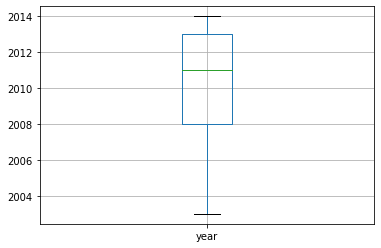

In [31]:
#Data Visualization
data.boxplot(column='year')


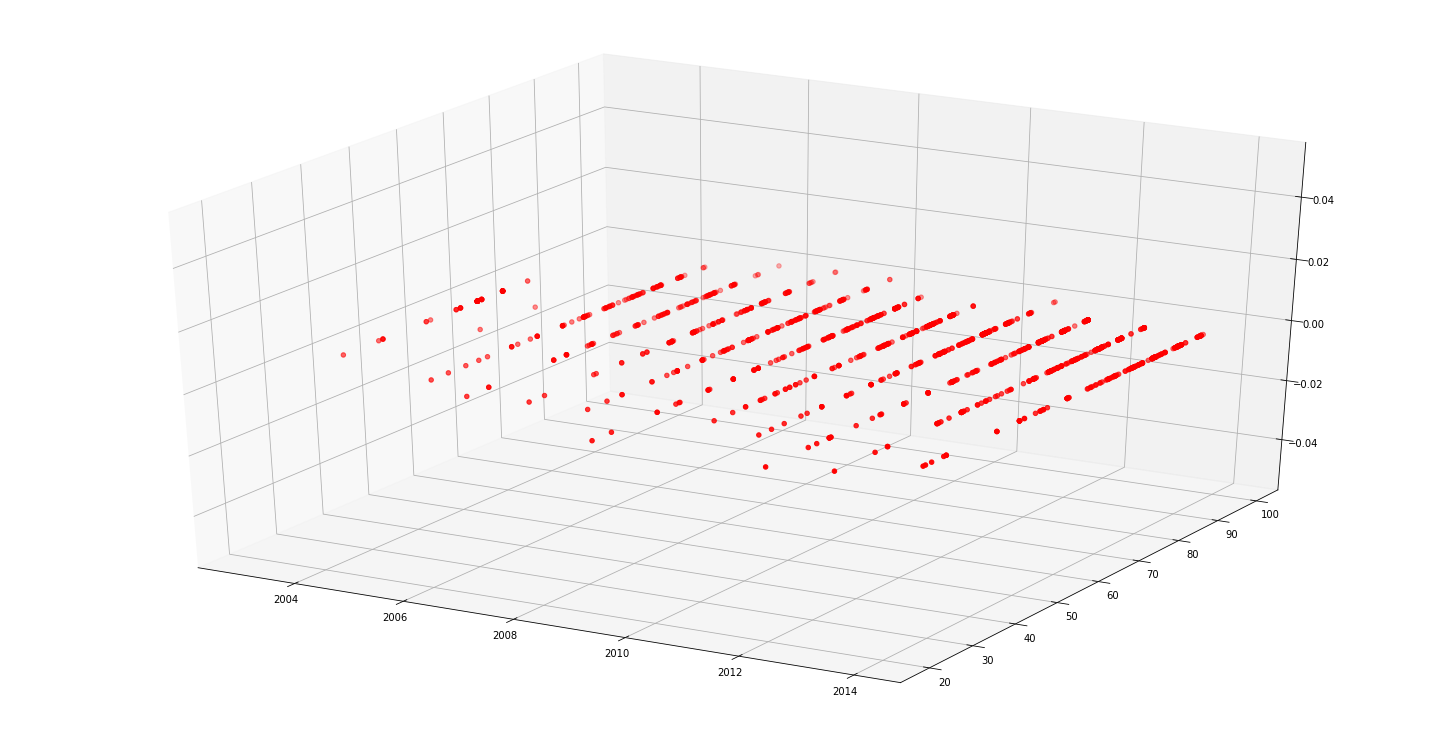

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.00000,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.00000,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.00000,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.00000,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.00000,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30.000000,5.5,7.4,81.0,1.500000,0.100000,4049.00000,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,29.200000,6.1,6.7,308.0,1.400000,0.300000,5672.00000,...,100,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44
7,3185,RIVER MANDOVI AT AMONA BRIDGE,GOA,29.600000,6.4,6.7,414.0,1.000000,0.200000,9423.00000,...,100,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44
8,3186,RIVER MANDOVI AT IFFI JETTY,GOA,30.000000,6.4,7.6,305.0,2.200000,0.100000,4990.00000,...,100,0,100,16.5,28.10,23.40,0.00,2.8,11.24,82.04
9,3187,RIVER MANDOVI NEAR HOTEL MARRIOT,GOA,30.100000,6.3,7.6,77.0,2.300000,0.100000,4301.00000,...,100,80,100,16.5,28.10,23.40,0.72,2.8,11.24,82.76


In [32]:
#visualizing the filttered data

year=data['year'].values
AQI=data['wqi'].values
data['wqi']=pd.to_numeric(data['wqi'])
data['year']=pd.to_numeric(data['year'])

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='red')
plt.show()
data

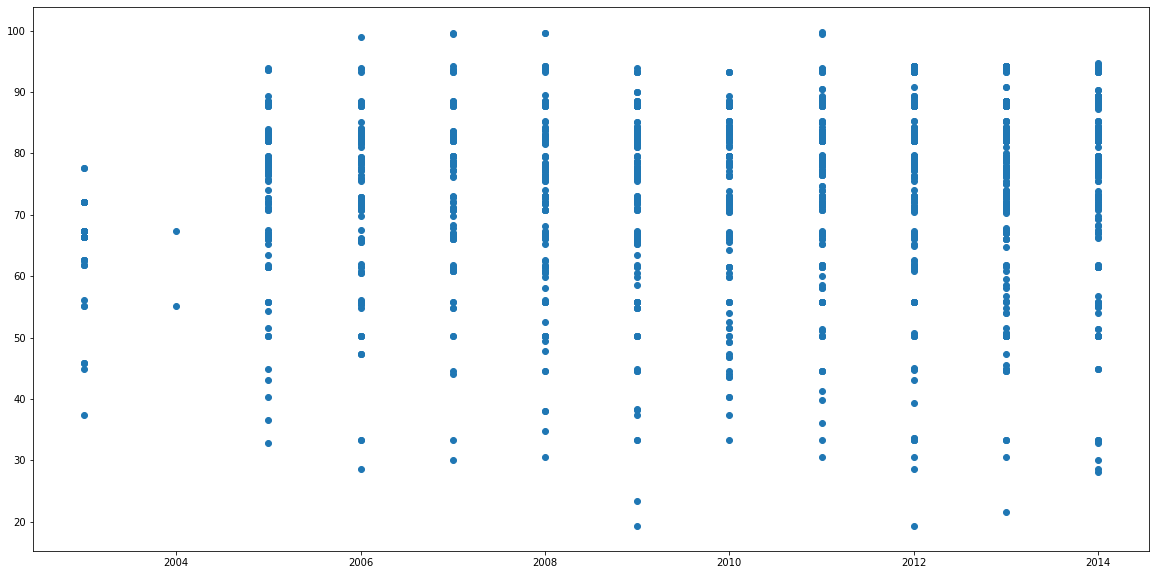

In [33]:
#scatter plot of data points
cols =['year']
y = data['wqi']
x=data[cols]

plt.scatter(x,y)
plt.show()

In [34]:
data.head(20)

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30.0,5.5,7.4,81.0,1.500000,0.1,4049.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,29.2,6.1,6.7,308.0,1.400000,0.3,5672.0,...,100,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44
7,3185,RIVER MANDOVI AT AMONA BRIDGE,GOA,29.6,6.4,6.7,414.0,1.000000,0.2,9423.0,...,100,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44
8,3186,RIVER MANDOVI AT IFFI JETTY,GOA,30.0,6.4,7.6,305.0,2.200000,0.1,4990.0,...,100,0,100,16.5,28.10,23.40,0.00,2.8,11.24,82.04
9,3187,RIVER MANDOVI NEAR HOTEL MARRIOT,GOA,30.1,6.3,7.6,77.0,2.300000,0.1,4301.0,...,100,80,100,16.5,28.10,23.40,0.72,2.8,11.24,82.76


In [35]:
data.tail(20)

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
1971,1631,"MYNTDU RIVER JOWAI, MEGHALAYA",NAN,15.000000,6.9,142.0,7.3,2.2,1.623079,1573.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,11.24,66.44
1972,1632,"GANOL RIVER TURA, MEGHALAYA",NAN,20.000000,6.9,145.0,7.8,1.8,1.623079,245.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,16.86,72.06
1973,1633,"SIMSANG RIVER WILLIAMNAGAR, MEGHALAYA",NAN,21.000000,7.0,145.0,7.3,2.3,1.623079,363.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,16.86,72.06
1974,1455,"RUSHIKULYA AT GANJAM U/S, ORISSA",NAN,30.000000,8.1,569.0,8.2,1.6,1.028000,6050.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,11.24,66.44
1975,1456,"RUSHIKULYA AT GANJAM D/S, ORISSA",NAN,27.000000,7.7,28598.0,7.7,1.7,0.962000,3200.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,11.24,66.44
1976,1642,"NAGAVALLI AT JAYKAYPUR D/S, ORISSA",NAN,30.000000,7.4,219.0,6.8,3.0,0.964000,11300.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,0.00,55.20
1977,1643,"NAGAVALLI AT RAYAGADA D/S, ORISSA",NAN,29.000000,7.2,198.0,7.2,2.1,1.030000,4950.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,11.24,66.44
1978,1685,"ARASALAR RIVER KARAIKAL REGION, PONDICHERRY",NAN,29.000000,8.0,978.0,5.4,9.0,1.240000,533687.16568,...,60,100,100,0.0,28.1,14.04,0.9,2.8,0.00,45.84
1979,1717,"KODRA DAM, MOUNT ABU, RAJASTHAN",NAN,21.000000,7.6,203.0,6.3,1.9,0.107000,109.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,16.86,72.06
1980,1159,TAMBIRAPARANI AT BDG.NR. MADURA COATS LTD.PAPA...,NAN,29.000000,7.2,150.0,7.5,1.3,0.142000,327.00000,...,100,100,100,0.0,28.1,23.40,0.9,2.8,16.86,72.06


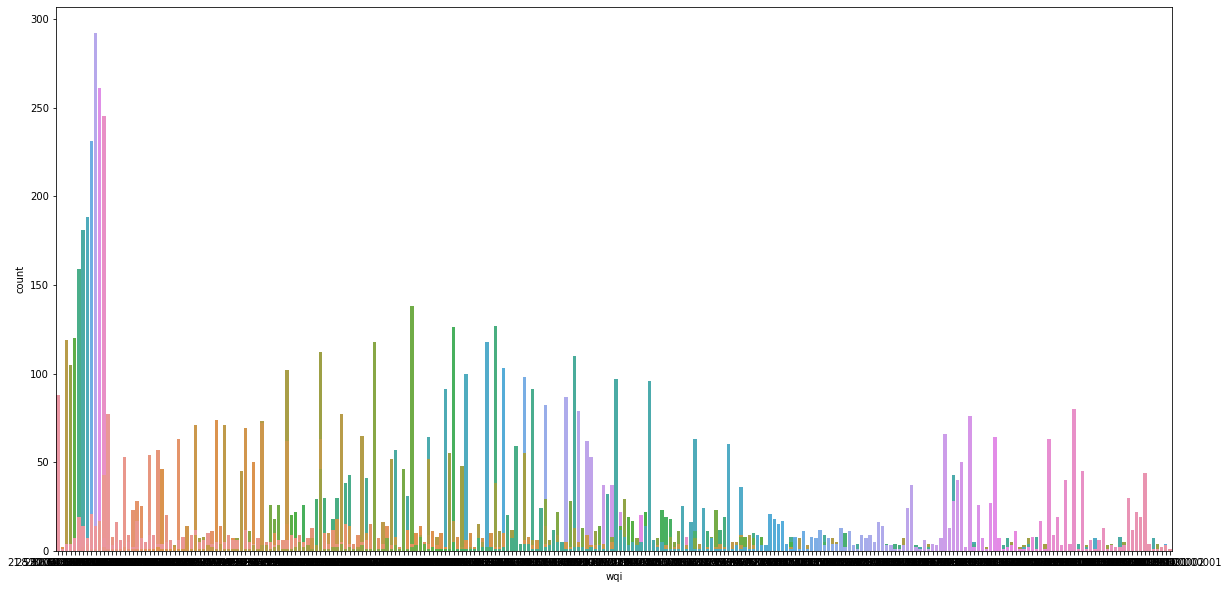

In [36]:
sns.countplot(data['year']) 
sns.countplot(data['do'])
sns.countplot(data['ph'])
sns.countplot(data['co'])
sns.countplot(data['bod'])
sns.countplot(data['na'])
sns.countplot(data['tc'])
sns.countplot(data['wqi'])

In [37]:
#Removing un necessary columns location state and the columnn created to calculate Water Quality Index
data.drop(['Temp','station','location','state','nbdo',"nec","nna","wph","wdo","wbdo","wec","wna","wco","npH","ndo","nco"],axis = 1,inplace=True)

In [38]:
data.head()

,do,ph,co,bod,na,tc,year,wqi
0,6.7,7.5,203.0,6.940049,0.1,27.0,2014,84.46
1,5.7,7.2,189.0,2.000000,0.2,8391.0,2014,76.96
2,6.3,6.9,179.0,1.700000,0.1,5330.0,2014,79.28
3,5.8,6.9,64.0,3.800000,0.5,8443.0,2014,69.34
4,5.8,7.3,83.0,1.900000,0.4,5500.0,2014,77.14


In [39]:
data.tail()

,do,ph,co,bod,na,tc,year,wqi
1986,7.9,738.0,7.2,2.7,0.518000,202.0,2003,72.06
1987,7.5,585.0,6.3,2.6,0.155000,315.0,2003,72.06
1988,7.6,98.0,6.2,1.2,1.623079,570.0,2003,66.44
1989,7.7,91.0,6.5,1.3,1.623079,562.0,2003,66.44
1990,7.6,110.0,5.7,1.1,1.623079,546.0,2003,66.44


In [40]:
data

,do,ph,co,bod,na,tc,year,wqi
0,6.7,7.5,203.0,6.940049,0.100000,27.00000,2014,84.46
1,5.7,7.2,189.0,2.000000,0.200000,8391.00000,2014,76.96
2,6.3,6.9,179.0,1.700000,0.100000,5330.00000,2014,79.28
3,5.8,6.9,64.0,3.800000,0.500000,8443.00000,2014,69.34
4,5.8,7.3,83.0,1.900000,0.400000,5500.00000,2014,77.14
5,5.5,7.4,81.0,1.500000,0.100000,4049.00000,2014,77.14
6,6.1,6.7,308.0,1.400000,0.300000,5672.00000,2014,75.44
7,6.4,6.7,414.0,1.000000,0.200000,9423.00000,2014,75.44
8,6.4,7.6,305.0,2.200000,0.100000,4990.00000,2014,82.04
9,6.3,7.6,77.0,2.300000,0.100000,4301.00000,2014,82.76


# Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [41]:
#Splitting the data into dependent and independent variables

In [42]:
x = data.iloc[:,0:7].values
y = data.iloc[:,7:].values

In [43]:
x

array([[6.70000000e+00, 7.50000000e+00, 2.03000000e+02, ...,
        1.00000000e-01, 2.70000000e+01, 2.01400000e+03],
       [5.70000000e+00, 7.20000000e+00, 1.89000000e+02, ...,
        2.00000000e-01, 8.39100000e+03, 2.01400000e+03],
       [6.30000000e+00, 6.90000000e+00, 1.79000000e+02, ...,
        1.00000000e-01, 5.33000000e+03, 2.01400000e+03],
       ...,
       [7.60000000e+00, 9.80000000e+01, 6.20000000e+00, ...,
        1.62307871e+00, 5.70000000e+02, 2.00300000e+03],
       [7.70000000e+00, 9.10000000e+01, 6.50000000e+00, ...,
        1.62307871e+00, 5.62000000e+02, 2.00300000e+03],
       [7.60000000e+00, 1.10000000e+02, 5.70000000e+00, ...,
        1.62307871e+00, 5.46000000e+02, 2.00300000e+03]])

In [44]:
x.shape

(1991, 7)

In [45]:
y.shape

(1991, 1)

## Feature Scaling

There is huge disparity between the x values so let us use feature scaling.
Feature scaling is a method used to normalize the range of independent variables or features of data. 

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)    

In [48]:
import joblib
joblib.dump(sc,"standard")

['standard']

## Splitting the data into training and testing set

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

In [50]:
X_train

array([[5.5000e+00, 7.4000e+00, 6.3500e+02, ..., 5.0800e+00, 5.5000e+03,
        2.0120e+03],
       [8.1000e+00, 5.6900e+02, 8.2000e+00, ..., 1.0280e+00, 6.0500e+03,
        2.0030e+03],
       [6.3000e+00, 7.5800e+00, 3.7980e+02, ..., 1.5750e+00, 4.9630e+03,
        2.0050e+03],
       ...,
       [7.3000e+00, 6.8000e+00, 6.9000e+01, ..., 1.2000e-01, 2.4460e+03,
        2.0120e+03],
       [6.8000e+00, 7.8000e+00, 2.3761e+04, ..., 6.7000e-01, 4.6000e+02,
        2.0100e+03],
       [7.3000e+00, 6.5000e+00, 4.4000e+01, ..., 2.1000e-01, 4.0000e+02,
        2.0090e+03]])

In [51]:
X_train.shape

(1592, 7)

In [52]:
X_test.shape

(399, 7)

In [53]:
y_train.shape

(1592, 1)

In [54]:
y_test.shape

(399, 1)

Random Forest Regressor 

	A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
	n_estimators = number of trees in the forest


In [55]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(n_estimators =40,random_state=1)
reg_rf.fit(X_train,y_train)

C:\Users\win10\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [56]:
y_pred = reg_rf.predict(X_test)

In [57]:
y_pred[10:17]

array([88.2   , 82.94  , 71.88  , 79.64  , 82.94  , 82.0425, 32.5855])

In [58]:
y_test[10:17]

array([[88.2 ],
       [82.94],
       [71.88],
       [79.64],
       [82.94],
       [81.78],
       [34.72]])

In [59]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)

In [60]:
rfaccuracy = r2_score(y_test,y_pred)

In [61]:
accuracy


0.9731749432294077

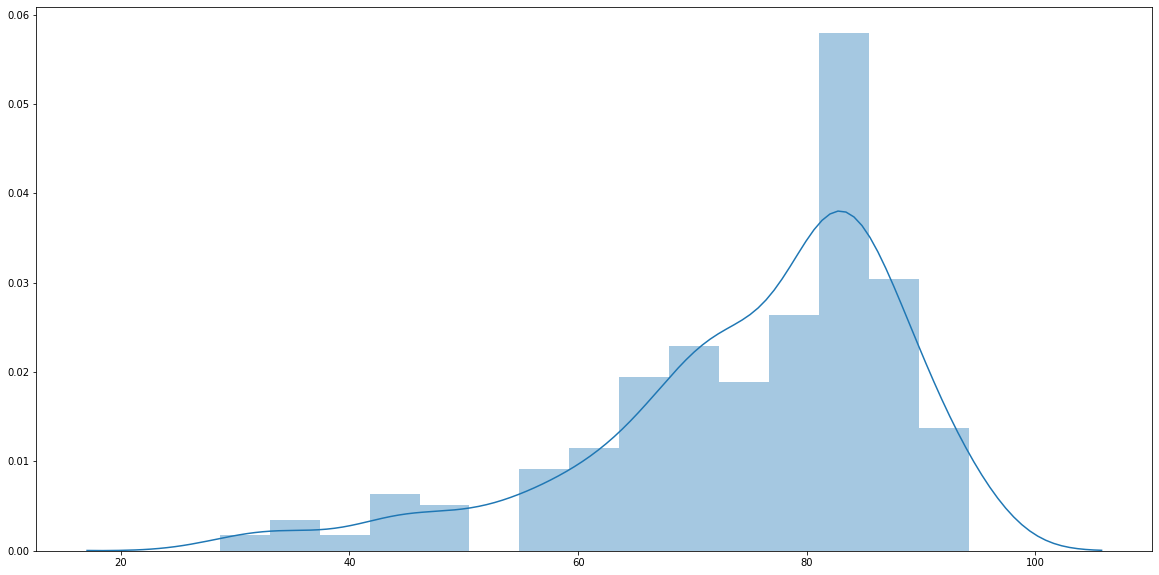

In [62]:
sns.distplot(y_test)
plt.show()

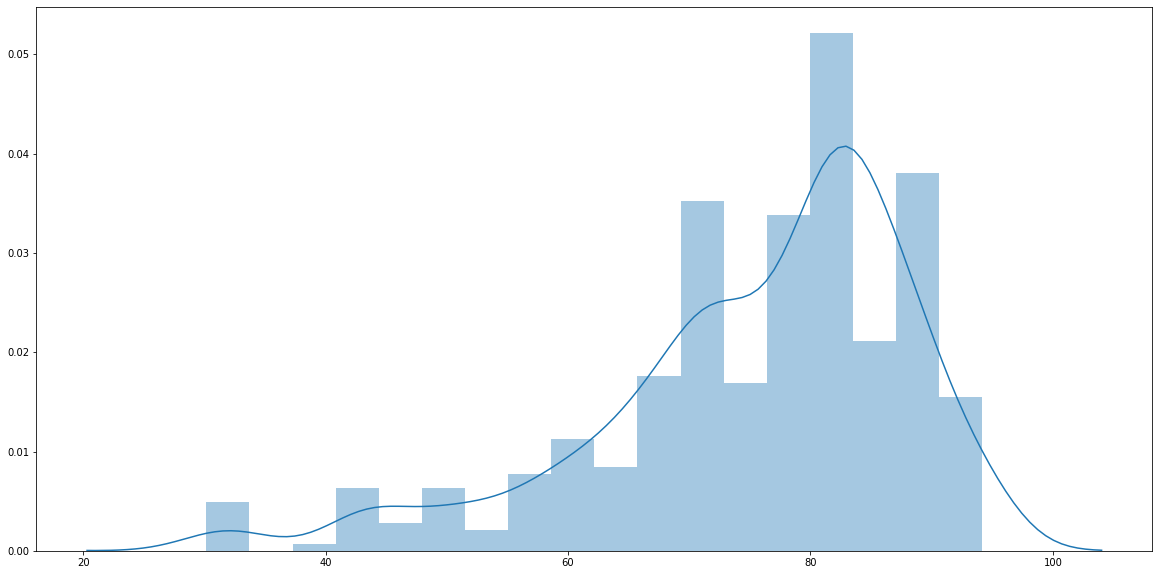

In [63]:
sns.distplot(y_pred)
plt.show()

In [64]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.8770137844611704
MSE: 4.921127252506268
RMSE: 2.2183613890676757


In [65]:
metrics.r2_score(y_test,y_pred)

0.9731749432294077

### Save the model to reuse it again

In [66]:
import pickle
pickle.dump(reg_rf,open('wqi.pkl','wb'))
model = pickle.load(open('wqi.pkl','rb'))